In [1]:
from google.colab import files


uploaded = files.upload()



Saving Gold Price (2013-2023).csv to Gold Price (2013-2023).csv


In [2]:
import pandas as pd
import io

df = pd.read_csv(io.BytesIO(uploaded['Gold Price (2013-2023).csv']))
print(df)


            Date     Price      Open      High       Low     Vol. Change %
0     12/30/2022  1,826.20  1,821.80  1,832.40  1,819.80  107.50K    0.01%
1     12/29/2022  1,826.00  1,812.30  1,827.30  1,811.20  105.99K    0.56%
2     12/28/2022  1,815.80  1,822.40  1,822.80  1,804.20  118.08K   -0.40%
3     12/27/2022  1,823.10  1,808.20  1,841.90  1,808.00  159.62K    0.74%
4     12/26/2022  1,809.70  1,805.80  1,811.95  1,805.55      NaN    0.30%
...          ...       ...       ...       ...       ...      ...      ...
2578  01/08/2013  1,663.20  1,651.50  1,662.60  1,648.80    0.13K    0.97%
2579  01/07/2013  1,647.20  1,657.30  1,663.80  1,645.30    0.09K   -0.16%
2580  01/04/2013  1,649.90  1,664.40  1,664.40  1,630.00    0.31K   -1.53%
2581  01/03/2013  1,675.60  1,688.00  1,689.30  1,664.30    0.19K   -0.85%
2582  01/02/2013  1,689.90  1,675.80  1,695.00  1,672.10    0.06K    0.78%

[2583 rows x 7 columns]


Enter the start date for forecast (YYYY-MM-DD): 2014-12-20
Enter the end date for forecast (YYYY-MM-DD): 2015-02-21
Enter the frequency of forecast (W for weekly, M for monthly, Y for yearly): W


/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


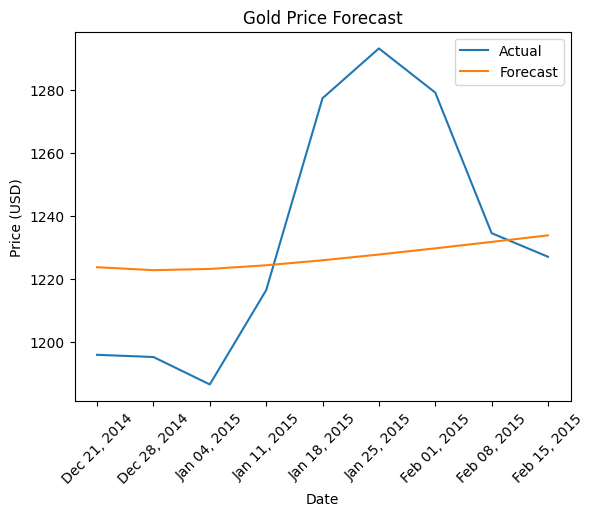

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
from pandas import date_range

# load data from csv file
df = pd.read_csv('Gold Price (2013-2023).csv', parse_dates=['Date'])
df.drop(columns=['Open', 'High', 'Low', 'Vol.', 'Change %'], inplace=True)
df['Price'] = pd.to_numeric(df['Price'].str.replace(',', ''))
df['Price'] = pd.to_numeric(df['Price'], errors='coerce')
df["Price"] = df["Price"].round(2)
df.set_index('Date', inplace=True)

# function to generate forecast for given time period
def generate_forecast(start_date, end_date, freq):
    # resample data based on frequency
    if freq == 'W':
        # weekly forecast
        resampled_data = df.resample('W').last()
    elif freq == 'M':
        # monthly forecast
        resampled_data = df.resample('M').last()
    elif freq == 'Y':
        # yearly forecast
        resampled_data = df.resample('Y').last()
    else:
        print("Invalid frequency value. Please enter either 'W', 'M', or 'Y'.")
        return None
    
    # filter data based on start and end dates
    resampled_data = resampled_data[(resampled_data.index >= start_date) & (resampled_data.index <= end_date)]
    
    # fit ARIMA model and generate forecast
    model = ARIMA(resampled_data, order=(1,2,1))
    model_fit = model.fit()
    forecast = model_fit.forecast(len(resampled_data))
    
    return resampled_data, forecast

# take user input for forecast period
start_date = input("Enter the start date for forecast (YYYY-MM-DD): ")
end_date = input("Enter the end date for forecast (YYYY-MM-DD): ")

# take user input for frequency
freq = input("Enter the frequency of forecast (W for weekly, M for monthly, Y for yearly): ")

# generate forecast
df_forecast, forecast = generate_forecast(start_date, end_date, freq)

# create date range for x-axis labels
if freq == 'W':
    date_range = pd.date_range(start=df_forecast.index[0], end=df_forecast.index[-1], freq='W')
    date_labels = date_range.strftime('%b %d, %Y')
elif freq == 'M':
    date_range = pd.date_range(start=df_forecast.index[0], end=df_forecast.index[-1], freq='M')
    date_labels = date_range.strftime('%b %Y')
elif freq == 'Y':
    date_range = pd.date_range(start=df_forecast.index[0], end=df_forecast.index[-1], freq='Y')
    date_labels = date_range.strftime('%Y')
else:
    date_labels = None

# plot actual data and forecast
plt.plot(df_forecast.index, df_forecast['Price'], label='Actual')
plt.plot(df_forecast.index, forecast, label='Forecast')
plt.xticks(date_range, date_labels, rotation=45)
plt.xlabel('Date')
plt.ylabel('Price (USD)')
plt.title('Gold Price Forecast')
plt.legend()
plt.show()

